### <b>**Linear Regression** </b>

### **Agenda**

In this lesson, we will cover the following concepts with the help of a business use case:
* Use Case: Linear Regression
* Regression Algorithms
* Types of Model Evaluation Metrics
* Gradient Descent
* Types of Gradient Descents
* Use Case: Stochastic Gradient Descent (SGD)


### **Use Case: Linear Regression**

Note: At first, with the help of a use case, we are going to perform all the basic steps to reach the model training and predicition part.
  

#### <b> **Problem Statement:** </b>

Google Play Store team is about to launch a new feature wherein, certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have potential engagement gains.

#### <b> **Analysis to be done:** </b>

The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, are always great indicators of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

#### <b>**Dataset**</b>

Google Play Store data (**googleplaystore.csv**)

Link: https://www.dropbox.com/sh/i06ohrau3ucfgbm/AACeYXumL56543KnDNQFlj8ma?dl=0


#### <b> **Data Dictionary:**</b>

|Variables|Description|
|:-|:-|
|App| Application name|
|Category|Category to which the app belongs|
|Rating|Overall user rating of the app|
|Reviews|Number of user reviews for the app|
|Size|Size of the app|
|Installs|Number of user downloads/installs for the app|
|Type|Paid or Free|
|Price|Price of the app|
|Content Rating|Age group the app is targeted at - Children / Mature 21+ / Adult|
|Genres|An app can belong to multiple genres (apart from its main category)<br>For example, a musical family game will belong to Music, Game, Family genres|
|Last Updated|Date when the app was last updated on Play Store|
|Current Ver|Current version of the app available on Play Store|
|Android Ver|Minimum required Android version|

#### <b> **Solution:**</b>

#### <b> **Import Libraries**</b>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### <b> **Import and Check Dataset**</b>

In [130]:
inp0 = pd.read_csv("googleplaystore.csv")

In [131]:
# Check first five rows
inp0.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
# Check number of columns and rows, and data types
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### <b> **Check Data Types**</b>

In [ ]:
# Checking datatypes
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### <b> **Finding and Treating Null Values**</b>

In [ ]:
# Finding count of null values
inp0.isnull().sum(axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [135]:
# Calculate the percentage of missing values in the 'Rating' feature
total_entries = len(inp0)
missing_count = total_entries - inp0['Rating'].count()
missing_percentage = (missing_count / total_entries) * 100

print(f"Percentage of missing values in 'Rating': {missing_percentage:.2f}%")


Percentage of missing values in 'Rating': 13.60%


Since `Rating` is our target feature, we're going to drop all nulls.

In [136]:
# Drop rows where 'Rating' is null
inp0_clean = inp0.dropna(subset=['Rating'])

# Confirm the change
print(f"Original number of rows: {len(inp0)}")
print(f"Number of rows after dropping nulls in 'Rating': {len(inp0_clean)}")


Original number of rows: 10841
Number of rows after dropping nulls in 'Rating': 9367


In [137]:
inp0_clean.isnull().sum(axis=0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

#### <b> Handling the Variables </b>

**1. Clean the price column**

In [138]:
# Check unique values in 'Price' column
inp0_clean['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', 'Everyone', '$1.20'], dtype=object)

In [139]:
inp0_clean.Price.info()

<class 'pandas.core.series.Series'>
Index: 9367 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
9367 non-null   object
dtypes: object(1)
memory usage: 146.4+ KB


#### <b> Observations </b>
Some have $ symbols, some have 0, and there's even an 'Everyone' in this feature with data type object.
* We need to conditionally handle this.
* First, let's check for non-numeric values in `Price`

In [140]:
non_numeric_prices = inp0_clean[~inp0_clean['Price'].astype(str).str.replace('$','').str.replace('.','').str.isdigit()]
display(non_numeric_prices[['App', 'Price']])


,App,Price
10472,Life Made WI-Fi Touchscreen Photo Frame,Everyone


Looks like that 'Everyone' should be in the Content_Rating feature, but somethine went wrong. The best practice is to drop it, since it's won't affect our analysis and it is cleaner than trying to reconstruct the original data.

In [141]:
# Drop the problematic row
inp0_clean = inp0_clean.drop(index=10472)


In [142]:
non_numeric_prices = inp0_clean[~inp0_clean['Price'].astype(str).str.replace('$','').str.replace('.','').str.isdigit()]
display(non_numeric_prices[['App', 'Price']])

,App,Price


In [143]:
inp0_clean['Price'].value_counts().sort_values()

Price
$2.00       1
$2.56       1
$1.97       1
$2.90       1
$2.95       1
         ... 
$1.99      59
$4.99      70
$0.99     107
$2.99     114
0        8719
Name: count, Length: 73, dtype: int64

In [144]:
# Remove $ symbols, convert '0' (if string) to numeric form, and ensure decimals are preserved
inp0_clean['Price'] = (
    inp0_clean['Price']
    .astype(str)  # ensure string for replace ops
    .str.replace('$', '', regex=False)
)

# Convert to float, coercing errors (just in case)
inp0_clean['Price'] = pd.to_numeric(inp0_clean['Price'], errors='coerce')

In [145]:
# Show summary statistics
display(inp0_clean['Price'].describe())

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [146]:
inp0_clean['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

**The other columns with numeric data are:<br>**
1. Reviews
2. Installs
3. Size

**2. Convert reviews to numeric**

In [147]:
# Converting reviews to numeric
inp0_clean['Reviews'] = pd.to_numeric(inp0_clean['Reviews'], errors='coerce')


In [149]:
inp0_clean.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

**3. Handle the installs column**

In [150]:
# Check value counts in 'Installs' column

inp0_clean['Installs'].value_counts()

Installs
1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

We'll need to remove the commas and the plus signs, then cast to numeric.

In [151]:
inp0_clean['Installs'] = (
    inp0_clean['Installs']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('+', '', regex=False)
)
inp0_clean['Installs'] = pd.to_numeric(inp0_clean['Installs'], errors='coerce')


In [152]:
inp0_clean['Installs'].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

**4. Handle the app size field**

In [153]:
# Check the unique values in 'Size' column
inp0_clean['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

`Size` is also a mess, but most just need to be converted to MB. Let's write a function for that. We'll need to handle that one entry with 'Varies with device' too.

In [154]:
# Convert all size values to a consistent numeric format (in MB)
def convert_size(val):
    if val == 'Varies with device':
        return None
    elif 'M' in val:
        return float(val.replace('M', ''))
    elif 'k' in val:
        return float(val.replace('k', '')) / 1024
    else:
        return pd.to_numeric(val, errors='coerce')

In [155]:
inp0_clean['Size_MB'] = inp0_clean['Size'].apply(convert_size)

In [156]:
# Check for nulls (we expect one due to 'Varies with device')
print(inp0_clean['Size_MB'].describe())
print(inp0_clean['Size_MB'].isna().sum())


count    7729.000000
mean       22.957271
std        23.445811
min         0.008301
25%         5.300000
50%        14.000000
75%        33.000000
max       100.000000
Name: Size_MB, dtype: float64
1637


In [157]:
# Find Size entries that caused NaN in Size_MB
problem_rows = inp0_clean[inp0_clean['Size_MB'].isna()]
print(problem_rows['Size'].unique())


['Varies with device']


In [158]:
# Impute those NaNs with the median of the 'Size_MB' column
inp0_clean['Size_MB'] = inp0_clean['Size_MB'].fillna(inp0_clean['Size_MB'].median())

In [159]:
# Check for nulls again
inp0_clean['Size_MB'].isna().sum()

0

#### **Sanity checks**

1. Average rating should be between 1 and 5, as only these values are allowed on Play Store. Drop any rows that have a value outside this range.

In [160]:
#Checking the rating
inp0_clean.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### <b> Observations </b>

Min is 1 and max is 5. None of the values have rating outside the range.

2. Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [161]:
inp0_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
 13  Size_MB         9366 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB


In [162]:
# Find rows where Reviews > Installs
invalid_reviews = inp0_clean[inp0_clean['Reviews'] > inp0_clean['Installs']]

# Display them (or their count)
print(f"Number of apps where Reviews > Installs: {invalid_reviews.shape[0]}")
display(invalid_reviews[['App', 'Reviews', 'Installs']])


Number of apps where Reviews > Installs: 7


,App,Reviews,Installs
2454,KBA-EZ Health Guide,4,1
4663,Alarmy (Sleep If U Can) - Pro,10249,10000
5917,Ra Ga Ba,2,1
6700,Brick Breaker BR,7,5
7402,Trovami se ci riesci,11,10
8591,DN Blog,20,10
10697,Mu.F.O.,2,1


Since there are only 7 rows, we can safely drop them

In [163]:
inp0_clean = inp0_clean[~(inp0_clean['Reviews'] > inp0_clean['Installs'])]


In [164]:
# Find rows where Reviews > Installs, again
invalid_reviews = inp0_clean[inp0_clean['Reviews'] > inp0_clean['Installs']]

# Display them (or their count)
print(f"Number of apps where Reviews > Installs: {invalid_reviews.shape[0]}")
display(invalid_reviews[['App', 'Reviews', 'Installs']])

Number of apps where Reviews > Installs: 0


,App,Reviews,Installs


3. For free apps **(Type == “Free”)**, the price should not be **> 0**. Drop any such rows.

In [165]:
len(inp0_clean[(inp0_clean.Type == "Free") & (inp0_clean.Price>0)])

0

#### **EDA**

#### <b> Box Plot: Price</b>

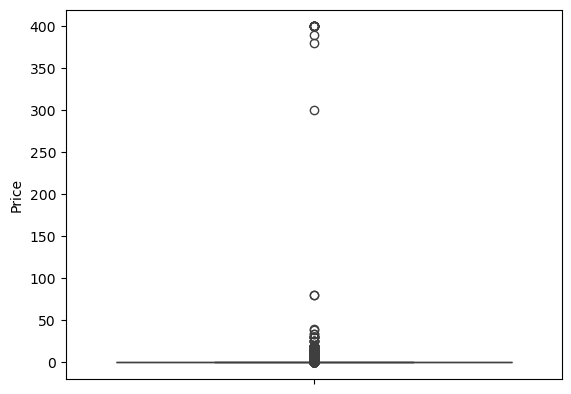

In [166]:
#Are there any outliers? Think about the price of usual apps on the Play Store.
sns.boxplot(inp0_clean.Price)
plt.show()

#### <b> Box Plot: Reviews</b>

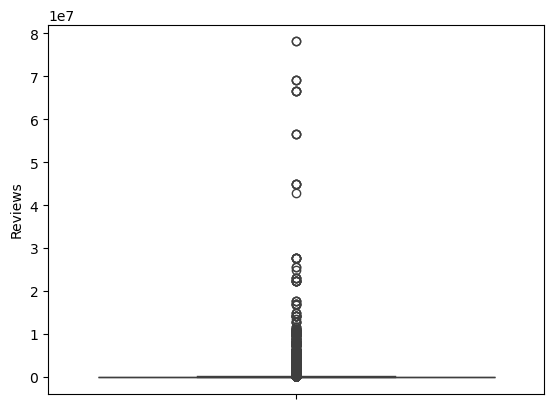

In [167]:
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp0_clean.Reviews)
plt.show()

#### **Checking Distribution and Skewness:**

How are the ratings distributed? Is it more toward higher ratings?

##### **Distribution of Ratings**

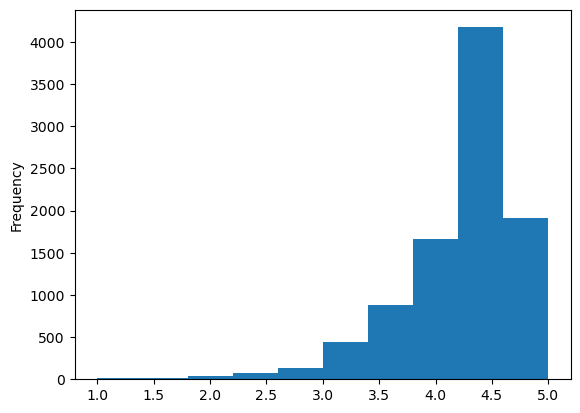

In [168]:
#Distributing the ratings
inp0_clean.Rating.plot.hist()
#Show plot
plt.show()

##### **Histogram: Size**

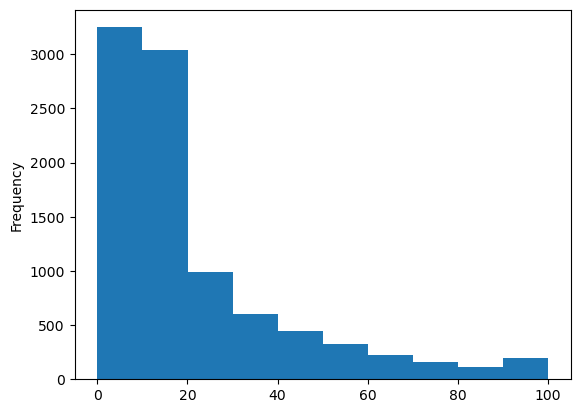

In [170]:
inp0_clean['Size_MB'].plot.hist()
#Show plot
plt.show()

#### <b> Pairplot </b>
Use a pairplot to plot numeric variables pair-wise and observe their relationships and distributions.

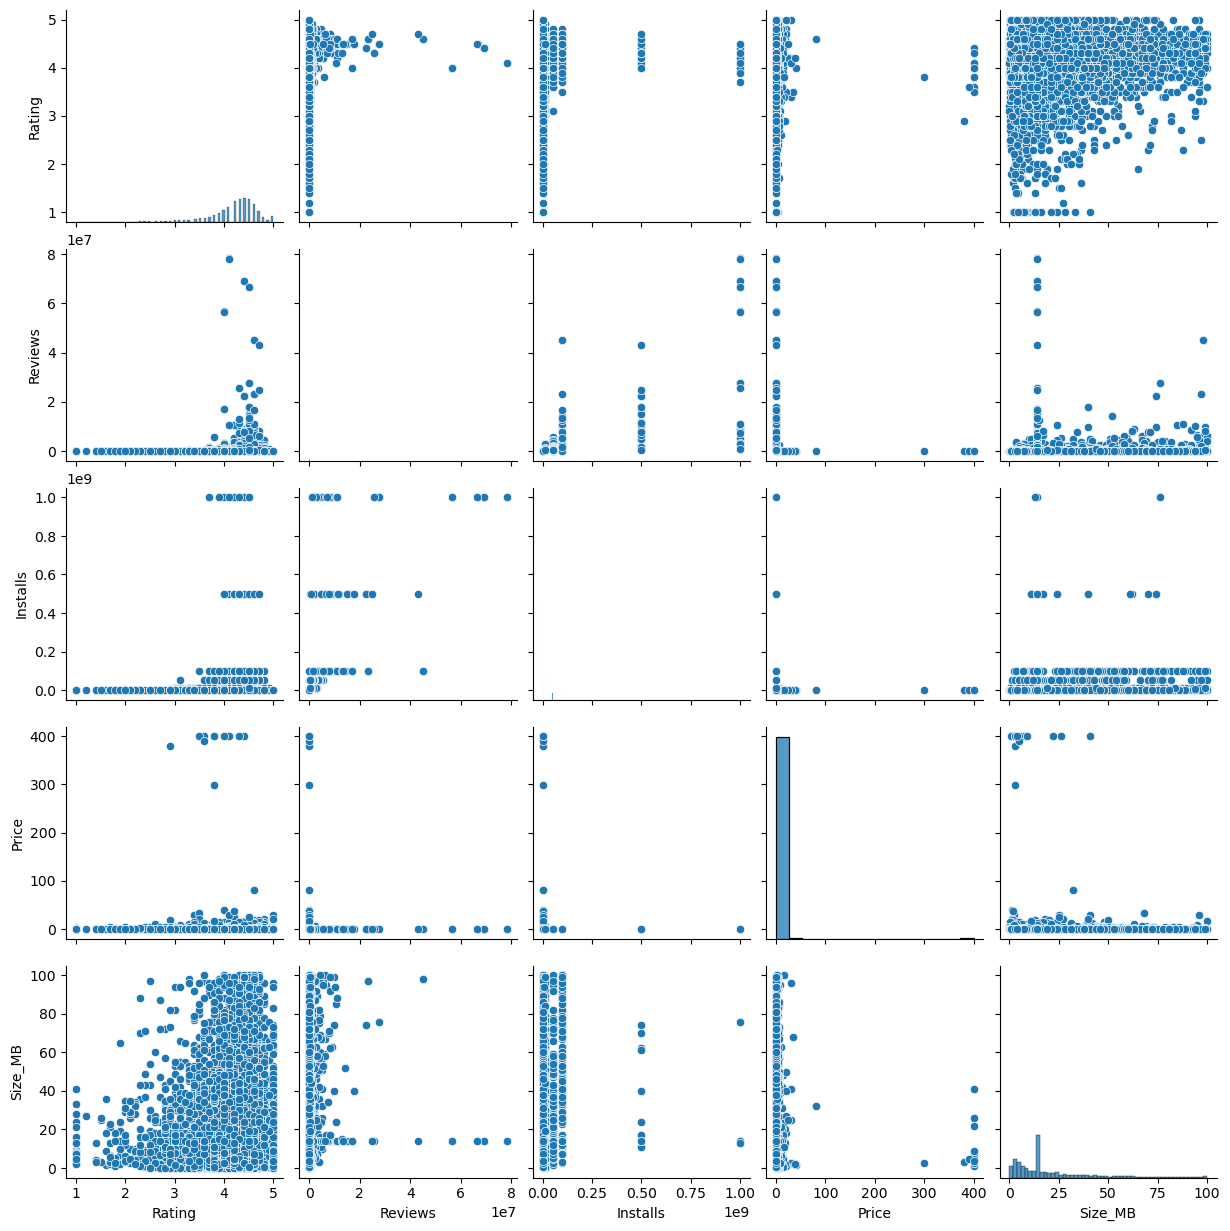

In [171]:
#Pair plot
sns.pairplot(data=inp0_clean)

## Quick Insights from Pairplot

1) Rating
- Cluster heavily near 4 to 5
- No clear relationship between Rating and other numeric variables
2) Reviews vs Installs
- Strong positive correlation
- Few outliers
3) Price
- Almost all apps are low-priced or free
- No visible link between price, rating, installs, or reviews
4) Size_MB
- Apps span a wide range of sizes, no strong relationship between Size_MB and installs, reviews, or price

##### **Outlier Treatment:**


##### **1. Price:** 

From the box plot, it seems like there are some apps with very high prices. A price of $200 for an application on the Play Store is very high and suspicious.
Check the records that have very high price:
Is 200 a high price?

In [172]:
#Checking the records
len(inp0_clean[inp0_clean.Price > 200])

15

In [173]:
inp0_clean[inp0_clean.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up,1.500000
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,26.000000
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.300000
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up,1.800000
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up,8.700000
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up,2.600000
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.700000
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up,2.900000
5358,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up,22.000000
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,0.942383


Let's drop them to clean up the `Price` feature.

In [174]:
inp0_clean = inp0_clean[inp0_clean.Price <= 200].copy()

inp0_clean.shape

(9344, 14)

##### **2. Reviews:**

Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [ ]:
# Dropping the records with more than 2 million reviews
inp0_clean = inp0_clean[inp0_clean.Reviews <= 2000000]
inp0_clean.shape

(8891, 14)

##### **3. Installs:**

There seem to be some outliers in this field too. Apps having a very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

Decide a threshold as the cutoff for outliers and drop records having values more than the threshold.




In [177]:
# Analyze the quantiles of the 'Installs' column
inp0_clean.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

#### <b> Observations </b>

Looks like there are just 1% of apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [ ]:
# How many apps have more than 100M installs
len(inp0_clean[inp0_clean.Installs >= 1000000000])

6

In [179]:
# Drop them
inp0_clean = inp0_clean[inp0_clean.Installs < 1000000000].copy()
inp0_clean.shape

(8885, 14)

#### **Bi-variate Analysis:**

Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relationhips between rating and the other features.

##### **1.	Make scatter plot/join plot for Rating vs. Price**

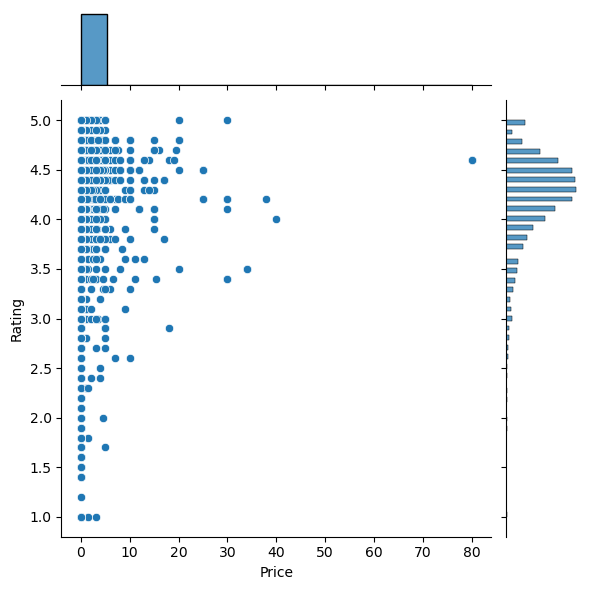

In [ ]:
# What pattern do you observe? Does rating increase with price?
sns.jointplot(x=inp0_clean.Price, y=inp0_clean.Rating)

##### **2.	Make scatter plot/joinplot for Rating vs Size**

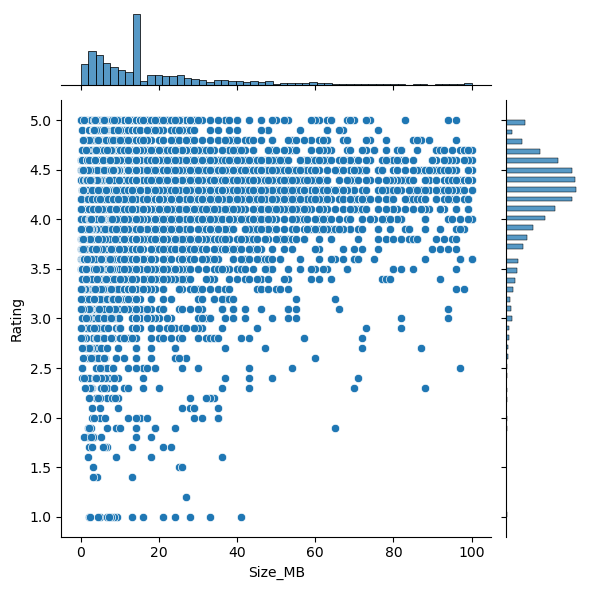

In [ ]:
# Are larger apps rated better?
sns.jointplot(x=inp0_clean.Size_MB, y=inp0_clean.Rating)

##### **3.	Make scatter plot/joinplot for Rating vs Reviews**

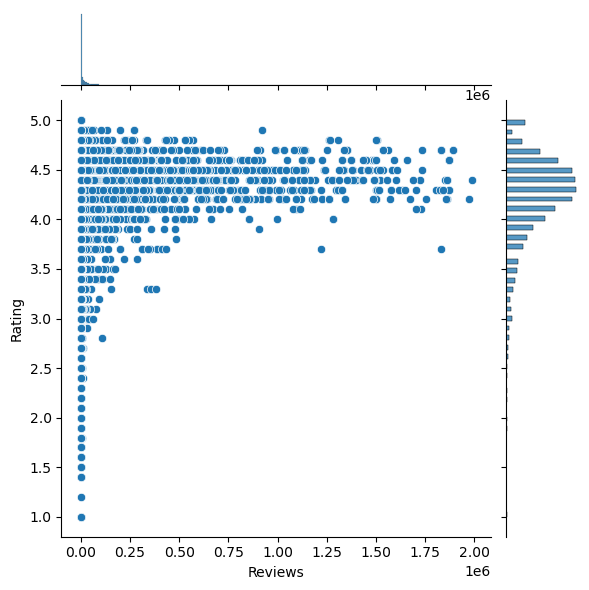

In [183]:
# Do more review mean a better rating?
sns.jointplot(x=inp0_clean.Reviews, y=inp0_clean.Rating)

##### **4.	Make boxplot for Rating vs Content Rating**

<Axes: xlabel='Content_Rating', ylabel='Rating'>

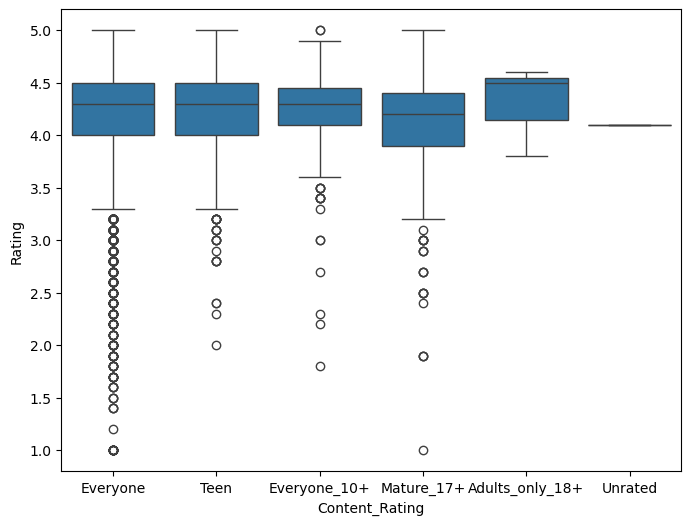

In [184]:
# Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize=[8,6])
sns.boxplot(x=inp0_clean['Content_Rating'], y=inp0_clean.Rating)

##### **5. Make boxplot for Ratings vs. Category**

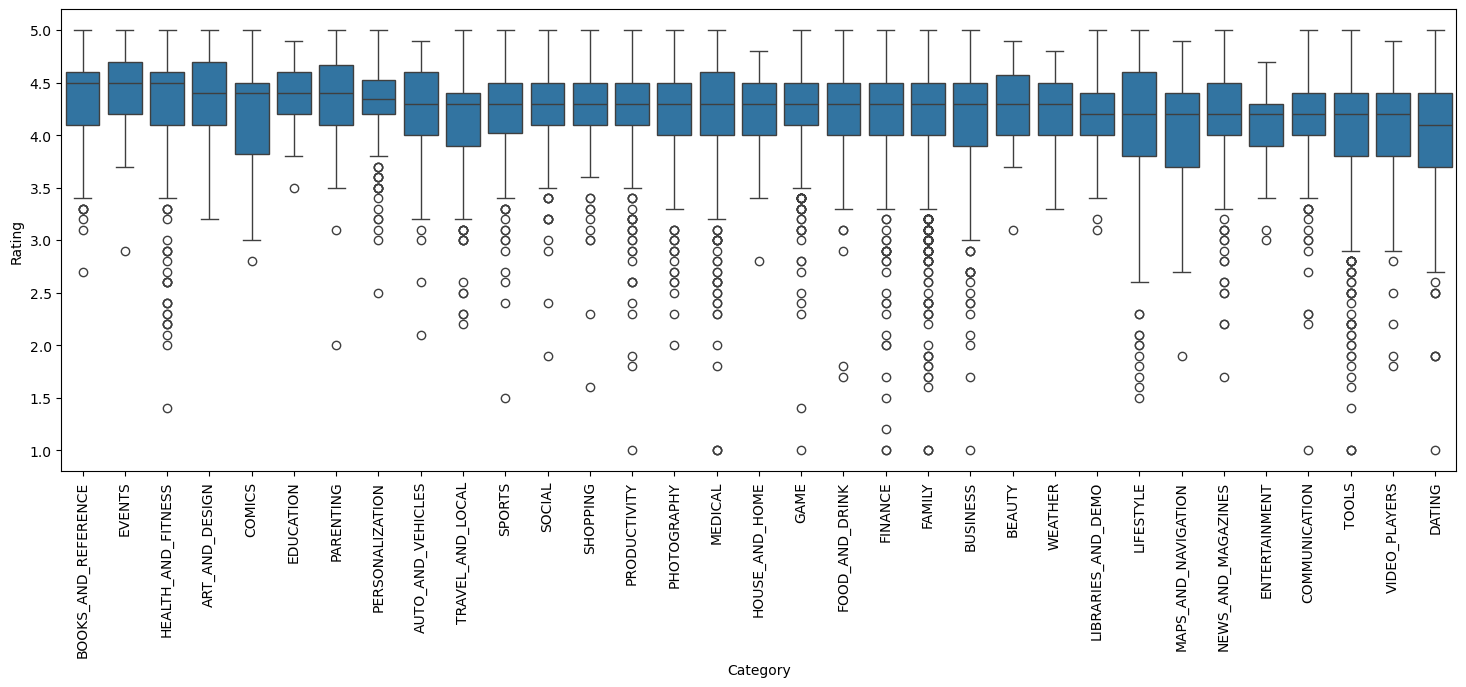

In [188]:
# Which genre has the best ratings, sorted by median?
plt.figure(figsize=[18,6])
g = sns.boxplot(
    x='Category',
    y='Rating',
    data=inp0_clean,
    order=inp0_clean.groupby('Category')['Rating'].median().sort_values(ascending=False).index
)
plt.xticks(rotation=90)
plt.show()


#### **Pre-processing the Dataset for Machine Learning**

##### **1. Make a copy of the dataset**

In [189]:
#Making a copy
inp1 = inp0_clean.copy()

##### **2. Apply log transformation (np.log1p) to Reviews and Installs**

Reviews and Installs have some values that are still relatively very high.
Before building a linear regression model, you need to reduce the skew.

In [191]:
# Checking the installs skew
inp0_clean.Installs.describe()

count    8.885000e+03
mean     5.592260e+06
std      2.420264e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      5.000000e+08
Name: Installs, dtype: float64

In [192]:
# Checking the Reviews skew
inp0_clean.Reviews.describe()

count    8.885000e+03
mean     1.042591e+05
std      2.664686e+05
min      1.000000e+00
25%      1.590000e+02
50%      4.264000e+03
75%      5.649600e+04
max      1.986068e+06
Name: Reviews, dtype: float64

Let's log transform `Installs` and `Reviews` 

In [193]:
inp1.Installs = inp1.Installs.apply(np.log1p)

In [194]:
inp1.Reviews = inp1.Reviews.apply(np.log1p)

##### **3. Drop columns App, Last Updated, Current Ver, and Android Ver**

 These variables are not useful for our task.

In [195]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price             float64
Content_Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

In [196]:
#Dropping the variables that are not useful for our task
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
inp1.shape

(8885, 10)

##### **4. Dummy Columns:**


Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric fields. Name of the dataframe should be **inp2**.

In [197]:
inp2 = pd.get_dummies(inp1, drop_first=True)

In [198]:
inp2.columns

Index(['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools_Education', 'Genres_Travel_&_Local',
       'Genres_Travel_&_Local_Action_&_Adventure', 'Genres_Trivia',
       'Genres_Video_Players_&_Editors',
       'Genres_Video_Players_&_Editors_Creativity',
       'Genres_Video_Players_&_Editors_Music_&_Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=569)

In [199]:
inp2.shape

(8885, 569)

#### **Train-test split**

Let us distribute the data into **training** and **test** datasets using the **train_test_split()** function so we can evaluate the model's performance.

In [200]:
from sklearn.model_selection import train_test_split


In [201]:
# Splitting the data into training and testing sets
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [202]:
df_train.shape, df_test.shape

((6219, 569), (2666, 569))

Now we can separate the dataframes into features (input variables) **X_train, X_test,** and target (output variable) **y_train, y_test.**

In [203]:
# Separating features and target variable of the training set
y_train = df_train.pop("Rating")
X_train = df_train

In [204]:
X_train.head(1)

,Reviews,Installs,Price,Size_MB,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
672,1.94591,4.615121,0.0,4.9,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [205]:
# Separating features and target variable of the testing set
y_test = df_test.pop("Rating")
X_test = df_test

In [206]:
X_test.head(1)

,Reviews,Installs,Price,Size_MB,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
4346,14.418302,17.727534,0.0,14.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### <b> **Regression Algorithms:**</b>

Note: Let us take a look at the theory part before moving on to the training and prediction.

#### <b>Types of Regression Algorithms:</b>

* Linear regression
* Multiple linear regression
* Polynomial regression
* Ridge regression
* Lasso regression
* ElasticNet regression

#### **When to use regression?**

If target variable is a continuous numeric variable (100–2000), then use a regression algorithm.<br><br>

![Use of Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Use%20of%20Reg.JPG)

<br><br>
Note: Let us take a look at the basics of linear regression and then move on to the model builiding part where we are going to use all the concepts that we saw in previous sessions.

#### **1. Linear Regression:**

Linear Regression is a statistical model used to predict the relationship between independent and dependent variables denoted by x and y respectively.


![Lin Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lin%20Reg.JPG)

#### **2. Muliple Linear Regression:**

Multiple linear regression is a statistical technique used to predict the outcome of a response variable through several explanatory variables and model the relationships between them.

![Multiple LR](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Multiple%20LR.JPG)

#### **3. Polynomial Regression:**

Polynomial regression is applied when data is not formed in a straight line. 
It is used to fit a linear model to non-linear data by creating new features from powers of non-linear features.

Example: Quadratic features 


![Pol Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Pol%20Reg.JPG)

### <b> Types of Model Evaluation Metrics:</b>

#### **Assumption** <br>

Let us consider the following:

$y_i$ – the observed value

$\bar{y}$ – the mean value of a sample

$\hat{y}_i$ – the value estimated by the regression line


#### **Sum of Squares Total (SST)** <br>

  The squared variations between the measured dependent variable and its mean are referred to as the **Sum of Squares Total (SST)** or **Total Sum of Squares (TSS)**.

  It's similar to the variation of descriptive statistics in that it's the dispersion of measured variables around the mean.

  It is a measure of the dataset's overall variability.

  $$
  SST = SSR + SSE = \sum_{i=1}^{n}(\hat{y}_i - \bar{y}_i)^2 + \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$

  ![SST](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SST.png)

<br/>

#### **Sum of Squares due to Regression (SSR)** <br>

  The difference between the predicted value and the dependent variable's mean are referred to as the **Sum of Squares due to Regression (SSR)** or **Explained Sum of Squares (ESS)**.

  It can be considered as a metric for describing how well our line fits the data.

  If the SSR (or ESS) is equal to the SST (or TSS), the regression model is flawless and captures all observed variability.

  $$
  SSR = \sum_{i=1}^{n}(y_i - \bar{y})^2
  $$

  ![SSR](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SSR.png)

<br/>

#### **Sum of Squares Error (SSE)** <br>

  The difference between the observed and predicted values are referred to as the **Sum of Squares Error (SSE)** or **Residual Sum of Squares (RSS)**, where `residual` stands for `remaining` or `unexplained`.

  This error must be reduced since the smaller it is, the better the regression's estimation power.

  $$
  SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
  $$

  $$
  Or
  $$

  $$
  SSE = \sum_{i=1}^{n}e_i^2
  $$

  $$
  where,
  $$
  
  $$
  e_i = (y_i - \hat{y}_i)
  $$

  ![SSE](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/SSE.png)

<br/>

#### **Relation Among SST, SSR, and SSE** <br>

  Since certain people use these abbreviations in various ways, it can be very confusing.

  We use one of two sets of notations for these abbreviations: SST, SSR, and SSE or TSS, ESS, and RSS.

  These equations are related in the following ways:

  $$
  SST = SSR + SSE
  $$

  $$Or$$

  $$
  TSS = ESS + RSS
  $$

  This is because the overall variability of the dataset is equivalent to the variability described by the regression line and the unknown variability (also known as error).

  For a constant total variability, a lower error would result in a better regression. A higher error, on the other hand, would result in a weaker regression. This should always be remembered regardless of the notation set used.

  ![Connection](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Connection.png)

<br/>

#### **R-Square Matrix** <br>

  The determination coefficient also known as **R2 (R-squared) score** is used for the performance evaluation of a linear regression model.

  R2 displays the proportion of data points inside the regression equation line.

  A higher R2 value means improved results.

  It is calculated as follows:

  $$
  R^2 = 1 - \frac{SSE}{SSR}
  $$

  $$
  Or
  $$

  $$
  R^2 = 1 - \frac{RSS}{ESS}
  $$

  The highest possible score is 1, which is achieved when the predicted and actual values are the same.

  The R2 score is 0 for a baseline model.

  In the worst-case scenario, the R2 score can also be negative.

<br/>


## Ordinary Least Squares (OLS)

OLS is the most common method used to fit a linear regression model, because it finds the line that minimizes the sum of squared differences between observed values and predicted values by the model.

#### **Import *statsmodels***, which contains OLS

In [ ]:
# Importing the statsmodel library
import statsmodels.api as sm

In [ ]:
# Applying OLS linear regression
model1 = sm.OLS(y_train, X_train.astype(float))

In [ ]:
# Fitting the model
model1 = model1.fit()

In [ ]:
# Finding the summary of the model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.420
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          2.94e-104
Time:                        13:42:33   Log-Likelihood:                -4012.5
No. Observations:                6219   AIC:                             8971.
Df Residuals:                    5746   BIC:                         1.216e+04
Df Model:                         472                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1731      0.006     27.230      0.000       0.161       0.186
Installs                                        -0.1481      0.006    -23.545      0.000      -0.160      -0.136
Price                                           -0.0005      0.003     -0.149      0.882      -0.007       0.006
Size_MB                                          3.5599      0.599      5.943      0.000       2.386       4.734
Category_AUTO_AND_VEHICLES                       0.0582      0.204      0.285      0.775      -0.342       0.458
Category_BEAUTY                                  0.1669      0.206      0.810      0.418      -0.237       0.571
Category_BOOKS_AND_REFERENCE                     0.0826      0.202      0.409      0.683      -0.313       0.479
Category_BUSINESS                                0.0183      0.202      0.091      0.928      -0.377       0.414
Category_COMICS                                  0.2534      0.314      0.808      0.419      -0.361       0.868
Category_COMMUNICATION                          -0.0347      0.202     -0.172      0.864      -0.431       0.361
Category_DATING                                 -0.0790      0.203     -0.390      0.697      -0.476       0.318
Category_EDUCATION                              -0.1452      0.399     -0.364      0.716      -0.928       0.637
Category_ENTERTAINMENT                          -0.2521      0.399     -0.632      0.527      -1.034       0.530
Category_EVENTS                                  0.1561      0.205      0.762      0.446      -0.246       0.558
Category_FAMILY                                 -0.1524      0.394     -0.386      0.699      -0.925       0.621
Category_FINANCE                                -0.0236      0.202     -0.117      0.907      -0.419       0.372
Category_FOOD_AND_DRINK                         -0.0032      0.203     -0.016      0.988      -0.401       0.394
Category_GAME                                   -0.0195      0.400     -0.049      0.961      -0.804       0.765
Category_HEALTH_AND_FITNESS                      0.0303      0.202      0.150      0.880      -0.365       0.426
Category_HOUSE_AND_HOME                          0.0408      0.204      0.200      0.842      -0.359       0.441
Category_LIBRARIES_AND_DEMO                      0.0574      0.206      0.278      0.781      -0.347       0.462
Category_LIFESTYLE                              -0.0820      0.316     -0.259      0.796      -0.702       0.538
Category_MAPS_AND_NAVIGATION                    -0.0529      0.203     -0.261      0.794      -0.450       0.344
Category_MEDICAL                                 0.0805      0.202      0.399      0.690      -0.315       0.476
Category_NEWS_AND_MAGAZINES     

In [212]:
# Extract the summary as a dataframe
summary_df = model1.summary2().tables[1]  # summary2 is cleaner for tables

# Add an absolute t value column (or use coef if you prefer)
summary_df["abs_t"] = summary_df["t"].abs()

# Sort by absolute t value (or any other metric you prefer)
summary_df_sorted = summary_df.sort_values(by="abs_t", ascending=False)

# Display top 20 most significant coefficients
top20 = summary_df_sorted.head(20)

import pandas as pd
pd.set_option('display.max_rows', 20)  # optional: limit displayed rows
display(top20)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],abs_t
Reviews,0.173095,0.006357,27.230300,1.132028e-153,0.160633,0.185557,27.230300
Installs,-0.148071,0.006289,-23.545331,4.221755e-117,-0.160400,-0.135743,23.545331
Size_55k,5.154346,0.694481,7.421863,1.322967e-13,3.792901,6.515791,7.421863
Size_26k,4.461298,0.619224,7.204664,6.567050e-13,3.247387,5.675210,7.204664
Size_17k,4.438900,0.623439,7.120025,1.211211e-12,3.216725,5.661075,7.120025
Size_375k,3.465742,0.489036,7.086880,1.536445e-12,2.507047,4.424438,7.086880
Size_70k,4.833865,0.689512,7.010563,2.646232e-12,3.482162,6.185568,7.010563
Size_364k,3.431544,0.492116,6.973042,3.450037e-12,2.466812,4.396277,6.973042
Size_8.5k,4.987952,0.718349,6.943630,4.243377e-12,3.579717,6.396187,6.943630
Size_51k,4.764993,0.697704,6.829535,9.397568e-12,3.397231,6.132756,6.829535


In [213]:
summary_df_sorted = summary_df.sort_values(by="P>|t|")
top20 = summary_df_sorted.head(20)
display(top20)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],abs_t
Reviews,0.173095,0.006357,27.230300,1.132028e-153,0.160633,0.185557,27.230300
Installs,-0.148071,0.006289,-23.545331,4.221755e-117,-0.160400,-0.135743,23.545331
Size_55k,5.154346,0.694481,7.421863,1.322967e-13,3.792901,6.515791,7.421863
Size_26k,4.461298,0.619224,7.204664,6.567050e-13,3.247387,5.675210,7.204664
Size_17k,4.438900,0.623439,7.120025,1.211211e-12,3.216725,5.661075,7.120025
Size_375k,3.465742,0.489036,7.086880,1.536445e-12,2.507047,4.424438,7.086880
Size_70k,4.833865,0.689512,7.010563,2.646232e-12,3.482162,6.185568,7.010563
Size_364k,3.431544,0.492116,6.973042,3.450037e-12,2.466812,4.396277,6.973042
Size_8.5k,4.987952,0.718349,6.943630,4.243377e-12,3.579717,6.396187,6.943630
Size_51k,4.764993,0.697704,6.829535,9.397568e-12,3.397231,6.132756,6.829535


#### **Identified values for *model1*:**

* **$R^2$ (uncentered): 0.219**, about 22% of the variance in `Rating` is explained by the model

  **Overview of $R^2$ (R-square):**
  ![R-square](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/R-square.JPG)

* **Adjusted $R^2$ (uncentered): 0.155**, adjusted for the number os predictors, penalizes overfitting

  **Overview of adjusted $R^2$:**

  The disadvantage with R-squared is that it assumes every independent variable in the model and explains variations in the dependent variable.
Use adjusted R-squared when working on a multiple linear regression problem.

  ![Adj R-square](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Adj%20R-square.JPG)


* **F-statistic: 3.420**, model is statistically significant overall
  
  **Overview of F-statistic:**

  The F-test indicates whether the linear regression model provides a better fit to the data in comparison to a model that contains no independent variables.
  
    Note: In general, the models with high F-statistic are considered as optimum.

  An F-test provides 2 values:
  * F-critical: This value is also called as F statistic
  * F-value: This value is without the “critical” part
  
    Note: The F-value is always observed along with the p-value. In general, the higher the F-value of a variable, the lesser the p-value.


* **AIC: 8971**

* **BIC: 12,160**

  **Overview of AIC and BIC:**

  * AIC and BIC are penalized-likelihood criteria.

  * They are used for selecting the best predictor subsets in regression and comparing the nonnested models.

  * AIC: "It is an estimate of a constant plus the relative distance between the unknown true likelihood function of the data and the fitted likelihood function of the model." 

  * BIC: "It is an estimate of a function of the posterior probability of a model being true, under a certain Bayesian setup."


    Source: https://www.methodology.psu.edu/resources/AIC-vs-BIC/



* **Formula:**

  The AIC or BIC for a model is usually written in the form:
  
  **$[-2logL + kp]$**
  
  Where: 
    * L = likelihood function
    * p = number of parameters in the model
    * k = 2 for AIC and log(n) for BIC


* In popular opinion:
  * Lower AIC tells that the model is closer to the truth
  * Lower BIC tells that the model is more likely to be the true model
  * Compare them to alternate models to provide further meaning

#### **Prediction and evaluation using "model1"**

In [214]:
# Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

**Metrics used for regression models:**
<br><br>

![RMSE1](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/RMSE1.JPG)


Lower values of RMSE indicate better fit.

In [ ]:
# Evaluate the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

#RMSE of "model1" = 0.0.6676612331116055

0.6676612331116055


#### **MPE:**

Mean Percentage Error measures the errors that indicate whether or not the prediction is biased. 

Bias is one component of the mean squared error and is measured as the variance of the errors plus the square of the mean error. 

$$MSE = VAR(E) + (MPE)^2$$

Therefore, minimizing the MSE will implicitly minimize the bias and the variance of the errors.


MPE is the computed average of percentage errors by which prediction of a model differ from actual values of the quantity being predicted.

Formula:

$$MPE=\ \frac{100\%}{n}\ \sum^{n}_{i=1}\ \frac{a_i - p_i}{a_i}$$


Where:
* $a_i$ = Actual value of the quantity being predicted
* $p_i$ = Predicted value
* $n$ = Number of different times for which the variable is predicted

In [216]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -0.4009832021901645


### Observation
- The MPE is close to zero, indicating that the model's bias is low (predictions slightly over on average)

#### **MAPE:**

Mean Absolute Percentage Error measures the prediction accuracy of a model.

Formula:

$$MAPE\ =\ \frac{1}{n}\ \sum^{n}_{i=1}\ \frac{|A_i-P_i|}{|A_i|}$$

Where:
* $A_i$ = Actual value of the quantity being predicted
* $P_i$ = Predicted value
* $n$ = Number of different times for which the variable is predicted


<br><br>
Mean Absolute Percentage Error is similar to Mean Absolute Error but is normalized by true observation.

The mean absolute percentage error is useful for reporting purpose and is expressed in generic percentage terms.

<br><br>
Note: In general, the desirable MAPE value is less than 20.


In [217]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 11.265519760228148


#### **Reiterating the Model**

**1. Feature selection using p-value:**

In regression analysis, p-values and coefficients together indicate which relationships in the model are statistically significant and the nature of those relationships.


Coefficients describe the mathematical relationship between each independent variable and the dependent variable.

p-values for the coefficients indicate whether these relationships are statistically significant.


In general, the threshold for the p-value is taken as $\leq$ 0.05.


Let's find the variables with p-value $\leq$ 0.05.

**2. List:**

Identified 99 variables that have p-value $\leq$ 0.05.

'Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY','Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS','Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION','Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE','Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS','Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE','Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES','Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY','Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL','Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone','Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated','Genres_Art_&_Design','Genres_Art_&_Design;Creativity','Genres_Art_&_Design;Pretend_Play','Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board;Brain_Games','Genres_Books_&_Reference','Genres_Business','Genres_Casual','Genres_Casual;Action_&_Adventure','Genres_Casual;Brain_Games','Genres_Casual;Pretend_Play','Genres_Comics','Genres_Comics;Creativity','Genres_Communication','Genres_Dating','Genres_Education','Genres_Education;Action_&_Adventure','Genres_Education;Creativity','Genres_Education;Education','Genres_Education;Pretend_Play','Genres_Educational;Education','Genres_Educational;Pretend_Play','Genres_Entertainment','Genres_Entertainment;Brain_Games','Genres_Entertainment;Creativity','Genres_Entertainment;Music_&_Video','Genres_Events','Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home','Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical','Genres_Music;Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting;Education','Genres_Parenting;Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity','Genres_Puzzle','Genres_Puzzle;Brain_Games','Genres_Racing;Action_&_Adventure','Genres_Role_Playing','Genres_Shopping','Genres_Simulation','Genres_Simulation;Action_&_Adventure','Genres_Social','Genres_Strategy','Genres_Tools','Genres_Tools;Education','Genres_Travel_&_Local','Genres_Travel_&_Local;Action_&_Adventure','Genres_Weather'

**3. Create a new dataset with chosen variables and split it into training and testing dataset**

In [218]:
# Create inp3 from the list of statistically significant features
inp3 = inp2[['Rating','Reviews','Installs','Category_AUTO_AND_VEHICLES','Category_BEAUTY',
             'Category_BOOKS_AND_REFERENCE','Category_BUSINESS','Category_COMICS',
             'Category_COMMUNICATION','Category_DATING','Category_EDUCATION','Category_EDUCATION',
             'Category_ENTERTAINMENT','Category_EVENTS','Category_FAMILY','Category_FINANCE',
             'Category_FOOD_AND_DRINK','Category_GAME','Category_HEALTH_AND_FITNESS',
             'Category_HOUSE_AND_HOME','Category_LIBRARIES_AND_DEMO','Category_LIFESTYLE',
             'Category_MAPS_AND_NAVIGATION','Category_MEDICAL','Category_NEWS_AND_MAGAZINES',
             'Category_PARENTING','Category_PERSONALIZATION','Category_PHOTOGRAPHY','Category_PRODUCTIVITY',
             'Category_SHOPPING','Category_SOCIAL','Category_SPORTS','Category_TOOLS','Category_TRAVEL_AND_LOCAL',
             'Category_VIDEO_PLAYERS','Category_WEATHER','Type_Paid','Content_Rating_Everyone',
             'Content_Rating_Everyone_10+','Content_Rating_Mature_17+','Content_Rating_Teen','Content_Rating_Unrated',
             'Genres_Art_&_Design','Genres_Art_&_Design_Creativity','Genres_Art_&_Design_Pretend_Play',
             'Genres_Auto_&_Vehicles','Genres_Beauty','Genres_Board_Brain_Games','Genres_Books_&_Reference',
             'Genres_Business','Genres_Casual','Genres_Casual_Action_&_Adventure','Genres_Casual_Brain_Games',
             'Genres_Casual_Pretend_Play','Genres_Comics','Genres_Comics_Creativity','Genres_Communication',
             'Genres_Dating','Genres_Education','Genres_Education_Action_&_Adventure','Genres_Education_Creativity',
             'Genres_Education_Education','Genres_Education_Pretend_Play','Genres_Educational_Education',
             'Genres_Educational_Pretend_Play','Genres_Entertainment','Genres_Entertainment_Brain_Games',
             'Genres_Entertainment_Creativity','Genres_Entertainment_Music_&_Video','Genres_Events',
             'Genres_Finance','Genres_Food_&_Drink','Genres_Health_&_Fitness','Genres_House_&_Home',
             'Genres_Libraries_&_Demo','Genres_Lifestyle','Genres_Maps_&_Navigation','Genres_Medical',
             'Genres_Music_Music_&_Video','Genres_News_&_Magazines','Genres_Parenting','Genres_Parenting_Education',
             'Genres_Parenting_Music_&_Video','Genres_Personalization','Genres_Photography','Genres_Productivity',
             'Genres_Puzzle','Genres_Puzzle_Brain_Games','Genres_Racing_Action_&_Adventure','Genres_Role_Playing',
             'Genres_Shopping','Genres_Simulation','Genres_Simulation_Action_&_Adventure','Genres_Social',
             'Genres_Strategy','Genres_Tools','Genres_Tools_Education','Genres_Travel_&_Local',
             'Genres_Travel_&_Local_Action_&_Adventure','Genres_Weather']]

In [219]:
#Checking datatypes
inp3.dtypes

Rating                                      float64
Reviews                                     float64
Installs                                    float64
Category_AUTO_AND_VEHICLES                     bool
Category_BEAUTY                                bool
                                             ...   
Genres_Tools                                   bool
Genres_Tools_Education                         bool
Genres_Travel_&_Local                          bool
Genres_Travel_&_Local_Action_&_Adventure       bool
Genres_Weather                                 bool
Length: 100, dtype: object

In [220]:
inp3.shape

(8885, 100)

In [233]:
# Save a CSV file
inp3.to_csv("googleplaystore_cleaned.csv", index=False)

In [221]:
# Test, train split imp3
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

In [222]:
df_train.shape, df_test.shape

((6219, 100), (2666, 100))

**4. Separate the new dataframes into X_train, y_train, X_test, y_test**

In [223]:
#Separating the new dataframes
y_train1 = df_train.pop("Rating")
X_train1 = df_train

In [224]:
X_train1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
672,1.94591,4.615121,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
y_test1 = df_test.pop("Rating")
X_test1 = df_test

In [226]:
X_test1.head(1)

,Reviews,Installs,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,...,Genres_Shopping,Genres_Simulation,Genres_Simulation_Action_&_Adventure,Genres_Social,Genres_Strategy,Genres_Tools,Genres_Tools_Education,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Weather
4346,14.418302,17.727534,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**5. Create the second model**

In [227]:
# Apply linear regression
model2 = sm.OLS(y_train1, X_train1.astype(float))

In [228]:
# Fit the model
model2 = model2.fit()

In [229]:
# Print the summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6418.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):                        0.00
Time:                        14:22:38   Log-Likelihood:                         -4290.7
No. Observations:                6219   AIC:                                      8725.
Df Residuals:                    6147   BIC:                                      9210.
Df Model:                          72                                                  
Covariance Type:            nonrobust                                                  
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Reviews                                      0.1693      0.006     27.572      0.000       0.157       0.181
Installs                                    -0.1432      0.006    -23.369      0.000      -0.155      -0.131
Category_AUTO_AND_VEHICLES                   1.2778      0.135      9.441      0.000       1.012       1.543
Category_BEAUTY                              1.4038      0.139     10.134      0.000       1.132       1.675
Category_BOOKS_AND_REFERENCE                 1.3145      0.133      9.896      0.000       1.054       1.575
Category_BUSINESS                            1.2372      0.132      9.376      0.000       0.979       1.496
Category_COMICS                              1.9136      0.238      8.050      0.000       1.448       2.380
Category_COMMUNICATION                       1.1976      0.132      9.053      0.000       0.938       1.457
Category_DATING                              1.1553      0.133      8.656      0.000       0.894       1.417
Category_EDUCATION                           1.2021      0.135      8.932      0.000       0.938       1.466
Category_EDUCATION                           1.2021      0.135      8.932      0.000       0.938       1.466
Category_ENTERTAINMENT                       2.3174      0.269      8.619      0.000       1.790       2.844
Category_EVENTS                              1.3889      0.137     10.146      0.000       1.121       1.657
Category_FAMILY                              2.4073      0.262      9.180      0.000       1.893       2.921
Category_FINANCE                             1.2122      0.132      9.191      0.000       0.954       1.471
Category_FOOD_AND_DRINK                      1.2128      0.134      9.068      0.000       0.951       1.475
Category_GAME                                2.4570      0.262      9.363      0.000       1.943       2.971
Category_HEALTH_AND_FITNESS                  1.2550      0.132      9.504      0.000       0.996       1.514
Category_HOUSE_AND_HOME                      1.2686      0.135      9.372      0.000       1.003       1.534
Category_LIBRARIES_AND_DEMO                  1.2730      0.136      9.384      0.000       1.007       1.539
Category_LIFESTYLE                           2.2498      0.552      4.078      0.000       1.168       3.331
Category_MAPS_AND_NAVIGATION                 1.1822      0.133      8.861      0.000       0.921       1.444
Category_MEDICAL                             1.3022      0.132      9.882      0.000       1.044       1.561
Category_NEWS_AND_MAGAZINES                  1.2073      0.132      9.125      0.000       0.948       1.467
Category_PARENTING                       

* Rating	R-squared (uncentered):	0.987, very high, the model explains 98.7% of the variation.

* Adj. R-squared (uncentered): 0.987, still very high

* F-statistic: 6418, compared to 3.420 from the previous model

* AIC: 8749, lower than previous model (8971)

* BIC: 9234, lower than previous model (12,160)

* Df Model: 72, fewer predictors than previous model (472), much simpler

#### **How Well Does the Model Fit the Data?**
 ***model2* performs better:**


* R-squared value:<br>

  The most common way to evaluate the overall fit of a linear model is by the **R-squared** value.<br>

  R-squared is between 0 and 1 (or between 0 to 100%), and higher is better because it means that more variance is explained by the model.<br>

  In the case of our models, model2 has a significantly higher R-squared value.

* F-statistics:<br>

  For numerical values, higher F-statistic means a better fit for the model.

  In the case of our models, model2 a much higher F-statistic value than model1.

* AIC and BIC: <br>

  Lower AIC and BIC mean better model fit.

  Between our two models, model2 has lesser AIC and BIC values than model1.

**Prediction using "model2"**

Let us perform prediction using model2 by importing **sklearn.metrics**

In [ ]:
#Importing sklearn.metrics
import sklearn.metrics as metrics
y_test_pred1= model2.predict(X_test1)
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred1)))


#RMSE value of model1 = 0.0.4934633627922355 

0.4934633627922355


In [231]:
#Calculating MAPE
def MAPE(y_test_pred1,y_test1):
    return np.mean(np.abs((y_test1 - y_test_pred1) / y_test1)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred1,y_test1)) )

MAPE: 9.802408238906704


> MAPE of 0 to 10 is very good

**model2** shows significant improvement as the RMSE and MAPE value of this model is lower than that of **model1**.

#### **4. Ridge Regression:**

* Ridge Regression (L2) is used when there is a problem of multicollinearity.

* This type of regularized linear regression adds a penalty to the loss function to shrink coefficient values.

* Ridge has a hyperparameter, $\lambda$, but often called alpha, that is set before training the model to control how the learning process works.

* The L2 refers to the L2 Norm (Euclidean Norm)

<br>

![Ridge Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Ridge%20Reg.JPG)

#### **5. Lasso Regression:**

* Lasso Regression (L1) is similar to ridge, but it also performs feature selection.

* Formally Least Absolute Shrinkage and Selection Operator (LASSO), it is another form of regularized linear regression.

* Instead of using an L2 penalty, Lasso uses L1 regularization: sum of absolute values of coefficients.

* It will set the coefficient value for features that do not help in decision making very low, potentially zero.

* Lasso also has a hyperparameter, $\lambda$, but often called alpha, that is set before training the model to control how the learning process works.

  ![Lasso Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/Lasso%20Reg.JPG)

* Lasso regression tends to exclude variables that are not required from the equation, whereas ridge tends to do better when all variables are present


#### **6. ElasticNet Regression:**

![ElasticNet Reg](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/ElasticNet%20Reg.JPG)

#### **Use Case: Ridge, Lasso, ElasticNet Regression for Training and Prediction:**

We are going to use the same dataset that we used in the previous use case at the time of training of "model2" i.e. inp3

**1. Ridge Regression:**

In [238]:
# Importing Ridge
import sklearn
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.001)
ridgeReg.fit(X_train1,y_train1)


Ridge(alpha=0.001)

**Evaluating using RMSE:**

In [239]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, ridgeReg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, ridgeReg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test1, y_test1)))


0.47946481842388106
0.4888991196087043
R2 Value/Coefficient of Determination: 0.1442767201968871


**2. Lasso Regression:**

In [240]:
#Importing Lasso
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001)
lassoreg.fit(X_train1,y_train1)


Lasso(alpha=0.001)

**Evaluating using RMSE:**

In [241]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, lassoreg.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, lassoreg.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test1, y_test1)))


0.4830250155525619
0.4907924377727769
R2 Value/Coefficient of Determination: 0.1376361128193131


**3. ElasticNet Regression:**

In [242]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet
Elastic = ElasticNet(alpha=0.001)
Elastic.fit(X_train1,y_train1)


ElasticNet(alpha=0.001)

**Evaluating using RMSE:**

In [243]:
print(np.sqrt(sklearn.metrics.mean_squared_error(y_train1, Elastic.predict(X_train1))))
print(np.sqrt(sklearn.metrics.mean_squared_error(y_test1, Elastic.predict(X_test1))))
print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test1, y_test1)))


0.4813422741861369
0.4898938819277486
R2 Value/Coefficient of Determination: 0.14079089970842718


## Regularized Linear Regression Observations

- The ElasticNet model gives similar train and test RMSE — no big overfit, but relatively low predictive power (R² ~ 0.14).
- Further tuning of the hyperparameter may yields better outcomes

---

### **Exercise:** Now that we know how to fit regularized linear regression models, try this excercise to hone your skills

* Perform the iteration of the model with Lasso, Ridge, and ElasticNet Regression by using the original dataset i.e., **inp0** as done in the case of Linear Regression.

* Use the following metrics to evaluate the model:
  * RMSE
  * MAPE
  * $R^2$ error

---

## **Cost Function:**
- A cost function (also called a loss function) is a function that evaluates a model's performance for a given dataset.

- It evaluates and expresses the error between predicted values and expected values as a single, real number.

> __GOAL__ Find parameter values that minimize the cost function (i.e., make predictions as close as possible to actual values).

### **Gradient:**

- A gradient is a measurement of how much a function's output varies as its inputs are changed.

## **Gradient Descent:**

- Gradient descent is the algorithm used to minimize the cost function.

- It's an optimization algorithm to discover the local minimum of a differentiable function or feature by computing partial derivatives of the cost function with respect to each parameter

- We use gradient descent to update the parameters of our model. 

- In linear regression, parameters correspond to coefficients, and in neural networks, parameters correspond to weights.

- The gradient descent equation is as follows:

![GD](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.7_Supervised_Learning_-_Regression_and_Classification/Trainer_PPT_and_IPYNB/0.2_Linear_Regression/GD.png)

### This process shows how you move from the cost function to its gradient, using partial derivatives.

- Start with the cost function derivative.
- Apply the chain rule for partial derivatives to take the partial derivative of the cost function $J$ with respect to the parameter $\theta$.
- Yield the gradient expression, which drives parameter updates in gradient descent.

### **Types of Gradient Descents:**

Gradient descents are divided into three categories, which vary primarily in the amount of data they use. These categories are:

1. Batch Gradient Descent (BGD)
2. Stochastic Gradient Descent (SGD) 
3. Mini-Batch Gradient Descent (Mini BGD)


#### **1. Batch Gradient Descent (BGD):**

- Batch gradient descent (BGD), also known as vanilla gradient descent, measures the error for each example in the training dataset, but the model is updated only after all of the training examples have been evaluated.

- This whole process is referred to as a training epoch because it resembles a loop.

- For each gradient descent iteration, it processes all the training samples. However, batch gradient descent is computationally very expensive when the number of training examples is high.

- Thus, if the number of training examples is high, we tend to use stochastic gradient descent (SGD) or mini-batch gradient descent (Mini BGD) instead.

#### **2. Stochastic Gradient Descent (SGD):**

- Stochastic gradient descent (SGD) is a form of gradient descent that processes one **random** training example per iteration.

- It estimates the error for each example in the training dataset and updates the parameters one by one.

- Based on the problem statement, batch gradient descent (BGD) can be much faster because the parameters are modified even after an iteration in which only a single example has been processed.

- One advantage is that the frequent updates allow us to track our progress in great detail.

- However, even if the number of training examples is high, it can only process one of them, which will add to the system's overhead and the number of iterations needed.

#### **3. Mini-Batch Gradient Descent (Mini BGD):**

- Mini-batch gradient descent (Mini BGD) combines the principles of stochastic gradient descent (SGD) and batch gradient descent (BGD) and is faster than both.

- It divides the training dataset into small batches and updates each of those batches. This establishes a balance between the robustness of stochastic gradient descent (SGD) and the efficiency of batch gradient descent (BGD).

- It is compatible with both larger and smaller training examples.


### <b>Use Case: Stochastic Gradient Descent (SGD):</b>

#### <b> Importing Required Libraries </b>
> NOTE: you may need to install tabulate

In [245]:
# Importing libraries
import numpy as np
import pandas as pd

from tabulate import tabulate

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# import warnings
# warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

#### <b> Load the Data</b>

In [252]:
# Load the data dictionary for the diabetes dataset from sklearn.datasets
diabetes = load_diabetes()

# Find the dict keys
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


#### <b> Dataset Description</b>

In [253]:
# Show the diabetes dataset description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### <b> Find Features and Target</b>

Let us split the data into **test** and **train.**

In [254]:
X = diabetes.data     # input features
Y = diabetes.target   # target feature, trying to predict diabetes progression

#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### <b>Find Feature's Name</b>

In [255]:
columns = diabetes.feature_names
columns

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [256]:
diabetes_df = pd.DataFrame(diabetes.data)
diabetes_df.columns = columns
diabetes_df["disease_progression"] = Y

In [257]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [258]:
print(diabetes_df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

### <b> Standardizing Data</b>
- Many models perform better when features are on similar scales.
- Without scaling, features like `s6` might dominate due to larger values compared to other features.

Let us standardize the **test** and **train** data using the **StandardScaler()** function.

In [259]:
# Fit and transform the data using StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [261]:
# Create a DataFrame for the training data
train_data=pd.DataFrame(x_train)
train_data['disease_progression']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,disease_progression
0,-0.397124,-0.946417,-1.804287,-0.528356,-0.766012,-0.721265,0.846650,-1.095886,-1.740873,-0.987122,90.0
1,1.239026,1.056616,1.682566,0.570809,0.014024,0.336702,-1.090962,0.662264,0.621808,0.896251,332.0
2,-0.174012,-0.946417,-0.316563,1.523419,0.245146,0.447042,0.324985,-0.092307,-0.707284,0.981859,104.0


In [262]:
# Create an array for the test data, for simplicity and performence
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# Shape of test and train data metrics to ensure they can be used in model training
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(309, 10)
(309,)
(133, 10)
(133,)


#### <b> Linear Regression: Diabetes Progression</b>

Let us calculate **R-Squared**, **Linear Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [269]:
print("Linear Regression: Diabetes Progression")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score = lin_reg.score(x_train, y_train)
print("R-squared:", lin_score)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy:", lin_accuracy, "%")
print()

lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = np.sqrt(lin_mse)

print("MAE:", lin_mae)
print("MSE:", lin_mse)
print("RMSE:", lin_rmse)
print()

Linear Regression: Diabetes Progression
R-squared: 0.5168342419521297
Linear Regressor Model Accuracy: 51.709436 %

MAE: 41.77369053533848
MSE: 2797.5501805354693
RMSE: 52.891872537616486



### Does This Taste Funny?
- In medical data, $R^2$ around 0.5 is "not bad" - disease progression is influenced by many unmeasured factors (lifestyle, genetics, medications).
- The error metrics give you a benchmark. The next step might be to compare these metrics across models (e.g. Ridge, Lasso, ElasticNet), but we just learned about gradient descent, so let's try that.

Let us plot a graph of the **Actual vs. Predicted Target**.

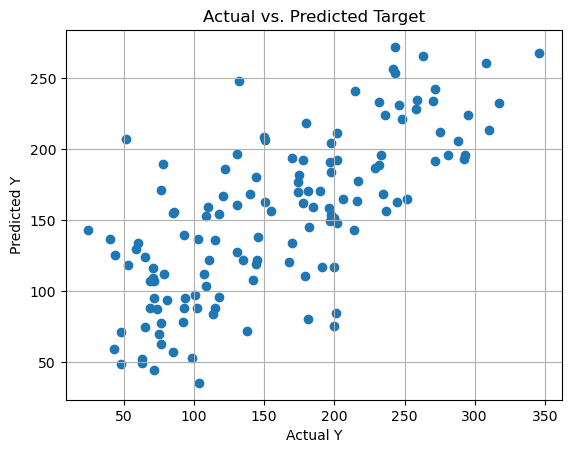

In [266]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

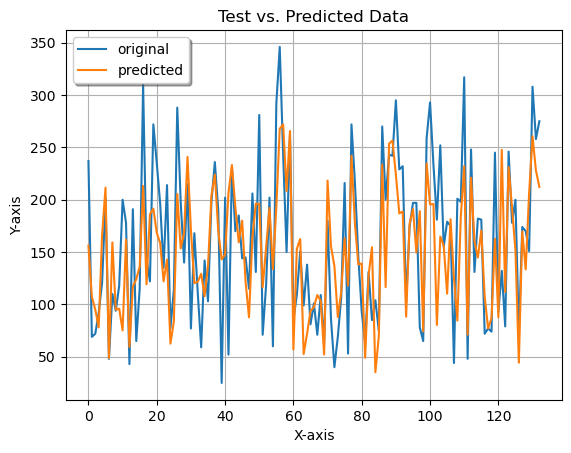

In [267]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> SGD Regression: Diabetes Progression</b>

Let us calculate **R-squared**, **SGD Regressor Model Accuracy**, **MAE**, **MSE**, and **RMSE**.

In [270]:
print("SGD Regression: Diabetes Prediction")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = np.sqrt(sgd_mse)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression: Diabetes Prediction
R-squared: 0.5127767333642818
SGD Regressor Model Accuracy: 51.634797 %

MAE: 41.99013189775583
MSE: 2799.6661704033677
RMSE: 52.911871734076534



### Does This Taste Less Funny?
- These results are nearly identical to ordinary linear regression

So, why use SGD?
- SGD sclaes better to huge datasets
- More flexible than linear regression
- Faster training when data doesn't fit into memory

Let us plot a graph of the **Actual vs. Predicted Target**.

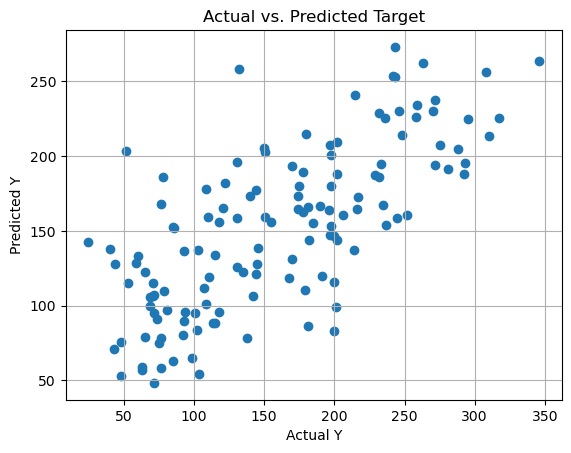

In [271]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

Let us plot a graph of the **Test vs. Predicted Data**.

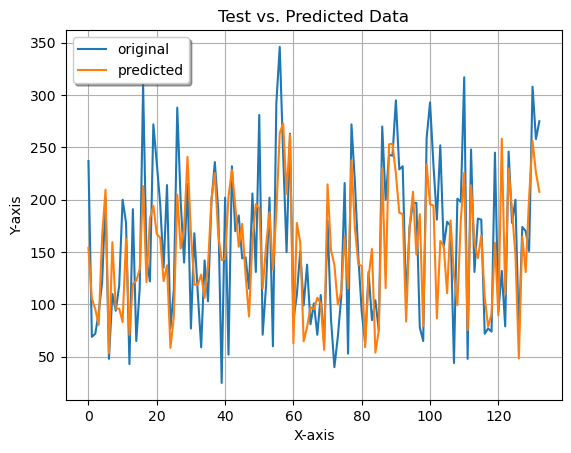

In [272]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#### <b> Model Comparison</b>

Let's compare our ordinary linear regression model with our SGD model:

**1. Evaluation Matrix Comparison**

In [273]:
# Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+------------+-------------+
|    | Comparison Matrix         | LR Model   | SGD Model   |
|----+---------------------------+------------+-------------|
| 0  | Accuracy (Variance Score) | 51.7094    | 51.6348     |
| 1  | R2 Score                  | 0.516834   | 0.512777    |
| 2  | MAE                       | 41.7737    | 41.9901     |
| 3  | MSE                       | 2797.55    | 2799.67     |
| 4  | RMSE                      | 52.8919    | 52.9119     |
+----+---------------------------+------------+-------------+


**2. Prediction Comparison - A: Scatter Plot**

Let us perform a comparison of the **Actual vs. Predicted Target** for the **Scatter Plot**.

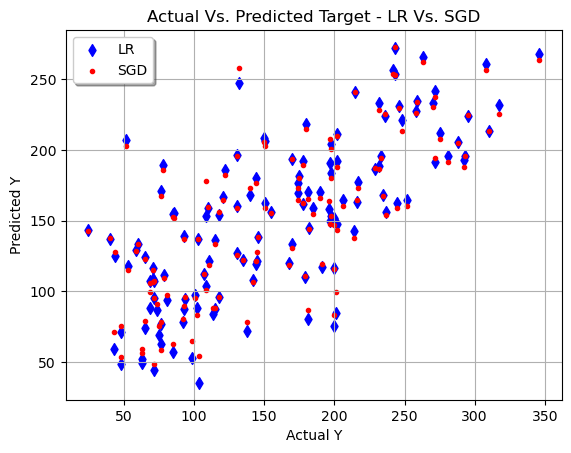

In [274]:
plt.scatter(y_test, lin_y_pred, c="b", marker="d", label='LR')
plt.scatter(y_test, sgd_y_pred, c="r", marker=".", label='SGD')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Vs. Predicted Target - LR Vs. SGD')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()
plt.show()

**3. Prediction Comparison - B: Line Graph**

Let us perform a comparison of **LR vs. SGD Prediction** for the **Line Graph**.

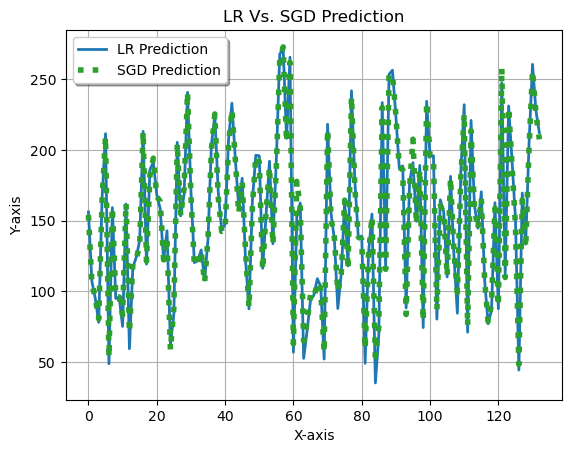

In [275]:
x_ax = range(len(sgd_y_pred))
plt.plot(x_ax, lin_y_pred, c="C0", linestyle="-", linewidth = 2, label="LR Prediction")
plt.plot(x_ax, sgd_y_pred, c="C2", linestyle=":", linewidth = 4, label="SGD Prediction")
plt.title("LR Vs. SGD Prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

**4. Prediction Comparison - C: Target Prediction Table**

Let us compare the **LR Predicted value** and **SGD Predicted value**.


In [276]:
prediction_table = pd.DataFrame(columns=["LR Predicted Value", "SGD Predicted Value"])
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred

print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+----------------------+-----------------------+
|     | LR Predicted Value   | SGD Predicted Value   |
|-----+----------------------+-----------------------|
| 0   | 156.152              | 154.025               |
| 1   | 107.185              | 105.748               |
| 2   | 95.0074              | 95.3424               |
| 3   | 78.0812              | 80.4506               |
| 4   | 166.618              | 164.985               |
| 5   | 211.56               | 209.615               |
| 6   | 48.7352              | 53.2311               |
| 7   | 159.259              | 159.452               |
| 8   | 94.934               | 95.8946               |
| 9   | 95.9029              | 96.0333               |
| 10  | 75.192               | 83.2065               |
| 11  | 161.787              | 162.491               |
| 12  | 59.3897              | 70.8993               |
| 13  | 117.146              | 119.611               |
| 14  | 124.096              | 122.567               |
| 15  | 13

**Note: In this topic, we saw the use of the linear regression methods, but in the next topic we will be working on "Logistic Regression".**

![Simplilearn_Logo](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Logo_Powered_By_Simplilearn/SL_Logo_1.png)